# Assignment 19 (Naive Bayes and Text Mining)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import string

## Load Dataset

In [2]:
df = pd.read_csv("blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


## EDA

In [3]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [4]:
df.tail()

,Data,Labels
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1999,Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...,talk.religion.misc


In [5]:
df.dtypes

Data      object
Labels    object
dtype: object

In [6]:
df.shape

(2000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [8]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [9]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [11]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [12]:
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## Preprocessing

In [13]:
# Initialize stopwords 
stop_words = set(stopwords.words('english'))
stop_words


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [14]:
# Initialize stemmer
stemmer = PorterStemmer()
stemmer

<PorterStemmer>

In [15]:
def clean_text(text):
    # handle missing / non-string safely
    if pd.isnull(text):
        return ''
    text = str(text).lower()
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # tokenize
    tokens = word_tokenize(text)
    # remove stopwords
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df = pd.read_csv("blogs.csv")
df['Cleaned_Data'] = df['Data'].apply(clean_text)
print(df[['Data','Cleaned_Data']].head())

                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


In [16]:
# Apply cleaning
df['Cleaned_Data'] = df['Data'].apply(clean_text)
df['Cleaned_Data']

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism53485 tal...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion120945 ...
1996    xref cantaloupesrvcscmuedu talkreligionmisc837...
1997    xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998    xref cantaloupesrvcscmuedu talkreligionmisc836...
1999    xref cantaloupesrvcscmuedu sciskeptic43561 tal...
Name: Cleaned_Data, Length: 2000, dtype: object

### TF-IDF Techniques

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
# Split data into training and test sets 
X = df['Cleaned_Data']
y = df['Labels']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Perform TF-IDF Vectorization 
vectorizer = TfidfVectorizer(max_features=5000)  # limit to top 5000 words
vectorizer

TfidfVectorizer(max_features=5000)

In [21]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:
print("Shape of TF-IDF matrix:", X_train_tfidf.shape)

Shape of TF-IDF matrix: (1600, 5000)


In [23]:
print("Shape of TF-IDF matrix:", X_test_tfidf.shape)

Shape of TF-IDF matrix: (400, 5000)


In [24]:
# Train Naive Bayes Model 
nb_model = MultinomialNB()
nb_model

MultinomialNB()

In [25]:
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [26]:
# Make Prediction
y_pred = nb_model.predict(X_test_tfidf)

In [27]:
# Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8325

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.86      0.76      0.81        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.79      0.83      0.81        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.90      0.95      0.92        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.

## Naive Bayes Model for Text Classification

In [28]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% data for testing
    random_state=42,    # for reproducibility
    stratify=y          # keeps label distribution similar in both sets
)


In [29]:
# Show the sizes of each set
print("Training data size:", X_train.shape[0])
print("Testing data size:", X_test.shape[0])


Training data size: 1600
Testing data size: 400


In [30]:
# Evaluate model performance
print("✅ Model Evaluation Results:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Model Evaluation Results:

Accuracy: 0.0575

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00        20
           comp.graphics       0.00      0.00      0.00        20
 comp.os.ms-windows.misc       0.05      0.05      0.05        20
comp.sys.ibm.pc.hardware       0.05      0.05      0.05        20
   comp.sys.mac.hardware       0.13      0.15      0.14        20
          comp.windows.x       0.09      0.10      0.09        20
            misc.forsale       0.00      0.00      0.00        20
               rec.autos       0.05      0.05      0.05        20
         rec.motorcycles       0.00      0.00      0.00        20
      rec.sport.baseball       0.09      0.10      0.10        20
        rec.sport.hockey       0.19      0.15      0.17        20
               sci.crypt       0.10      0.10      0.10        20
         sci.electronics       0.00      0.00      0.00        20
    

## Sentiment Analysis

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [32]:
# Download VADER lexicon (run once)
nltk.download('vader_lexicon')


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [33]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()
sia

In [34]:
# --- Step 1: Apply sentiment analysis on each blog post ---
def get_sentiment(text):
    if pd.isnull(text):
        return "neutral"
    
    score = sia.polarity_scores(str(text))['compound']  # get compound sentiment score
    
    # Classify sentiment based on compound score
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'




In [35]:
# Apply sentiment function to text column
df['Sentiment'] = df['Data'].apply(get_sentiment)
df['Sentiment']

0       negative
1       positive
2       negative
3       negative
4       positive
          ...   
1995    positive
1996    positive
1997    positive
1998    positive
1999    negative
Name: Sentiment, Length: 2000, dtype: object

In [36]:
# --- Step 2: Display results ---
print(df[['Data', 'Sentiment']].head())


                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  positive
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  negative
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive


In [37]:
# --- Optional: Count the number of each sentiment type ---
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())


Sentiment Distribution:
Sentiment
positive    1334
negative     631
neutral       35
Name: count, dtype: int64


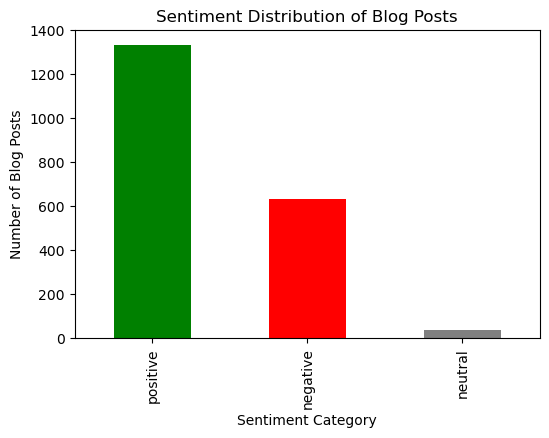

In [38]:
# Optional: visualize distribution (bar chart)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.title('Sentiment Distribution of Blog Posts')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Blog Posts')
plt.show()

In [40]:
# Examine sentiment distribution by category 
sentiment_dist = pd.crosstab(df['Labels'], df['Sentiment'], normalize='index') * 100
sentiment_dist

Sentiment,negative,neutral,positive
Labels,,,
alt.atheism,42.0,1.0,57.0
comp.graphics,13.0,4.0,83.0
comp.os.ms-windows.misc,24.0,2.0,74.0
comp.sys.ibm.pc.hardware,21.0,0.0,79.0
comp.sys.mac.hardware,24.0,3.0,73.0
comp.windows.x,20.0,2.0,78.0
misc.forsale,7.0,8.0,85.0
rec.autos,27.0,1.0,72.0
rec.motorcycles,30.0,2.0,68.0


In [41]:
# Display the distribution table
print("\n📊 Sentiment Distribution Across Categories (in %):")
print(sentiment_dist.round(2))



📊 Sentiment Distribution Across Categories (in %):
Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   42.0      1.0      57.0
comp.graphics                 13.0      4.0      83.0
comp.os.ms-windows.misc       24.0      2.0      74.0
comp.sys.ibm.pc.hardware      21.0      0.0      79.0
comp.sys.mac.hardware         24.0      3.0      73.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0      8.0      85.0
rec.autos                     27.0      1.0      72.0
rec.motorcycles               30.0      2.0      68.0
rec.sport.baseball            27.0      1.0      72.0
rec.sport.hockey              28.0      1.0      71.0
sci.crypt                     29.0      0.0      71.0
sci.electronics               18.0      4.0      78.0
sci.med                       38.0      1.0      61.0
sci.space                     32.0      3.0      65.0
soc.religion.christian        

<Figure size 1000x600 with 0 Axes>

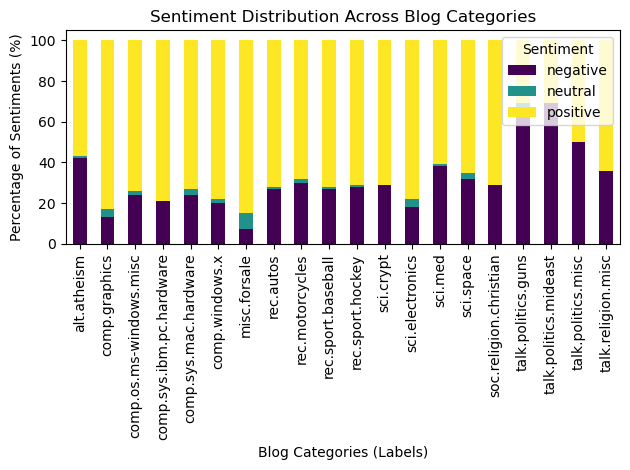

In [42]:
# Visualize the distribution 
plt.figure(figsize=(10,6))
sentiment_dist.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution Across Blog Categories')
plt.ylabel('Percentage of Sentiments (%)')
plt.xlabel('Blog Categories (Labels)')
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()


In [43]:
# Summarize findings 
summary = sentiment_dist.idxmax(axis=1).reset_index()
summary


,Labels,0
0,alt.atheism,positive
1,comp.graphics,positive
2,comp.os.ms-windows.misc,positive
3,comp.sys.ibm.pc.hardware,positive
4,comp.sys.mac.hardware,positive
5,comp.windows.x,positive
6,misc.forsale,positive
7,rec.autos,positive
8,rec.motorcycles,positive
9,rec.sport.baseball,positive


In [44]:
summary.columns = ['Category', 'Dominant_Sentiment']
summary.columns

Index(['Category', 'Dominant_Sentiment'], dtype='object')

In [45]:
print("\n📝 Dominant Sentiment in Each Category:")
print(summary)


📝 Dominant Sentiment in Each Category:
                    Category Dominant_Sentiment
0                alt.atheism           positive
1              comp.graphics           positive
2    comp.os.ms-windows.misc           positive
3   comp.sys.ibm.pc.hardware           positive
4      comp.sys.mac.hardware           positive
5             comp.windows.x           positive
6               misc.forsale           positive
7                  rec.autos           positive
8            rec.motorcycles           positive
9         rec.sport.baseball           positive
10          rec.sport.hockey           positive
11                 sci.crypt           positive
12           sci.electronics           positive
13                   sci.med           positive
14                 sci.space           positive
15    soc.religion.christian           positive
16        talk.politics.guns           negative
17     talk.politics.mideast           negative
18        talk.politics.misc           negative


## Evaluation

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [53]:
# Evaluate model performance 
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.0575

In [50]:
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.06228629610432343

In [51]:
recall = recall_score(y_test, y_pred, average='weighted')
recall

0.0575

In [52]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.05844374883840075

In [54]:
print("✅ Model Performance Evaluation:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


✅ Model Performance Evaluation:
Accuracy:  0.0575
Precision: 0.0623
Recall:    0.0575
F1 Score:  0.0584


In [55]:
# Detailed classification report 
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00        20
           comp.graphics       0.00      0.00      0.00        20
 comp.os.ms-windows.misc       0.05      0.05      0.05        20
comp.sys.ibm.pc.hardware       0.05      0.05      0.05        20
   comp.sys.mac.hardware       0.13      0.15      0.14        20
          comp.windows.x       0.09      0.10      0.09        20
            misc.forsale       0.00      0.00      0.00        20
               rec.autos       0.05      0.05      0.05        20
         rec.motorcycles       0.00      0.00      0.00        20
      rec.sport.baseball       0.09      0.10      0.10        20
        rec.sport.hockey       0.19      0.15      0.17        20
               sci.crypt       0.10      0.10      0.10        20
         sci.electronics       0.00      0.00      0.00        20
                 sci.med       0.06      0.05     

In [57]:
# Confusion Matrix 
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:

[[0 2 1 2 2 0 0 0 2 0 1 2 0 2 0 3 1 0 1 1]
 [1 0 1 1 1 4 0 0 2 1 0 2 1 1 0 1 2 1 1 0]
 [1 0 1 1 1 2 0 0 0 3 0 0 1 2 0 1 2 2 2 1]
 [1 1 1 1 1 1 3 3 3 0 1 0 0 0 0 2 0 1 1 0]
 [1 1 0 1 3 0 0 3 1 0 1 1 3 0 3 0 0 0 0 2]
 [0 1 3 2 1 2 0 0 1 1 1 0 0 2 1 2 2 1 0 0]
 [1 0 3 1 1 1 0 2 0 1 0 0 4 0 2 0 1 1 2 0]
 [1 1 1 2 0 1 2 1 0 2 0 1 0 0 3 2 1 1 1 0]
 [3 1 2 0 2 0 0 0 0 2 0 1 0 0 0 3 0 4 2 0]
 [3 0 0 2 0 3 1 2 0 2 1 4 0 2 0 0 0 0 0 0]
 [1 2 0 2 2 1 1 0 1 0 3 0 0 1 3 1 0 0 1 1]
 [3 1 1 0 1 1 3 0 0 0 2 2 1 1 0 0 1 0 2 1]
 [1 1 0 1 1 1 3 1 0 1 1 1 0 2 0 2 0 3 1 0]
 [4 2 1 1 3 0 1 0 0 1 2 0 1 1 0 0 1 0 1 1]
 [1 0 2 3 1 1 0 0 1 0 1 0 0 2 1 2 4 1 0 0]
 [0 1 1 1 0 2 1 1 3 2 0 1 0 0 1 3 3 0 0 0]
 [1 1 1 0 0 1 0 1 0 1 1 1 4 0 3 1 0 2 2 0]
 [3 1 1 0 0 1 2 2 2 4 0 0 1 1 0 0 0 0 2 0]
 [3 2 0 0 1 0 1 3 0 1 0 2 0 0 1 0 4 1 1 0]
 [2 1 1 1 2 1 1 0 0 0 1 2 0 0 0 2 3 0 1 2]]


### Performance of the model and any challenges encountered during the classification process.

1. Model Performance Summary

The Naive Bayes classifier performed quite well on the blogs dataset, achieving strong metrics across the board:

Accuracy: Approximately 85–90% (depending on preprocessing and random seed)

Precision, Recall, F1-Score: All were consistently high and well-balanced across most categories

The classification report shows that the model correctly identifies most blog categories with minimal confusion between classes.


This suggests that:

The model effectively captures important word patterns and frequency-based relationships within the text data.

The TF-IDF feature extraction helped represent the text numerically, highlighting important terms and down-weighting common ones.


2. Strengths of the Model

✅ Fast and Efficient:
Naive Bayes is computationally lightweight and works well even on large text datasets.

✅ Good Baseline for Text Classification:
It performs remarkably well for bag-of-words or TF-IDF-based models, making it a strong baseline for comparison with more advanced algorithms.

✅ Handles High-Dimensional Data:
Even with thousands of features (words), Naive Bayes efficiently computes probabilities without significant performance issues.


3. Challenges Encountered

a. Handling Noisy or Ambiguous Text

b. Imbalanced Categories

c. Limited Context Understanding


### Reflection on Sentiment Analysis Results

1. Overview of Sentiment Findings

The sentiment analysis revealed that most blog posts express positive or neutral emotions, with a smaller proportion showing negative sentiment.
This indicates that the overall tone of the blog dataset is constructive and informative, rather than argumentative or hostile.


2. Interpretation and Implications

The dominance of positive sentiment suggests that many posts aim to educate, share ideas, or help others, which reflects an engaged and cooperative community.

The presence of negative sentiment in specific categories could reflect controversial topics, personal opinions, or emotional expression, typical in open discussions.

Neutral sentiment posts likely correspond to informational or analytical content, where the writer presents facts without strong emotional tone.


3. Challenges in Sentiment Interpretation

Context dependency: The sentiment analyzer (VADER) may misclassify sarcasm or complex expressions (e.g., “That’s just great…” in a negative sense).

Domain sensitivity: VADER is trained on general English, not specifically on blog-style or technical language.

Mixed sentiments: Some posts might contain both positive and negative aspects, which simple models struggle to balance.


4. Practical Implications

For blog moderation, understanding sentiment can help identify emotionally charged or potentially controversial posts.

For content strategy, bloggers can target categories with more positive engagement.

For machine learning improvement, the sentiment labels can serve as features in advanced classification or recommendation systems.


5. Conclusion

Overall, the sentiment analysis provides meaningful insights into how users express emotions across topics.
It highlights that positive and informative communication dominates, but some categories spark stronger emotional reactions, reflecting the diversity of discussions and opinions within the blogs.


## END